In [82]:
## import required lib

import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt


In [83]:
data = pd.read_csv('data/digit-recognizer/train.csv')

In [84]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
data.shape

(42000, 785)

In [86]:
data.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [87]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)


data_dev = data[0:1000].T
y_dev = data_dev[0]
x_dev = data_dev[1:n]
x_dev = x_dev / 255.0

data_train = data[1000:m].T
y_train = data_train[0]
x_train = data_train[1:n]
x_train = x_train / 255.0


In [88]:
_, m_train = x_train.shape

In [89]:
y_train


array([5, 5, 0, ..., 3, 6, 3], dtype=int64)

In [90]:
x_train[:, 0].shape

(784,)

In [91]:
data_train

array([[5, 5, 0, ..., 3, 6, 3],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [92]:
def init_params(num_classes):
    w1 = np.random.rand(64, 784) - 0.5
    b1 = np.random.rand(64, 1) -0.5
    w2 = np.random.rand(num_classes, 64) - 0.5
    b2 = np.random.rand(num_classes, 1) -0.5
    return w1, b1, w2, b2

def ReLU(z):
    return np.maximum(z, 0)

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=0, keepdims=True))
    return exp_z / np.sum(exp_z, axis=0, keepdims=True)
    

def forward_prop(w1, b1, w2, b2, x):
    z1 = w1.dot(x) + b1
    a1 = ReLU(z1)

    z2 = w2.dot(a1) + b2
    a2 = softmax(z2)

    return z1, a1, z2, a2

def one_hot(y):
    classes = np.unique(y)
    one_hot_y = np.zeros((len(classes), y.size))
    for i, label in enumerate(y):
        idx = np.where(classes == label)[0][0]
        one_hot_y[idx, i] = 1
    return one_hot_y

def deriv_reLU(z):
    return z > 0

def backward_prop(z1, a1, z2, a2, w2, x, y):
    m = x.shape[1]
    one_hot_y = one_hot(y)
    dz2 = a2 - one_hot_y
    dw2 = 1/m * dz2.dot(a1.T)
    db2 = 1/m * np.sum(dz2, axis=1, keepdims=True)

    dz1 = w2.T.dot(dz2)*deriv_reLU(z1)
    dw1 = (1/m) * dz1.dot(x.T)
    db1 = (1/m) * np.sum(dz1, axis=1, keepdims=True)

    return dw1, db1, dw2, db2

def update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha):
    w1 = w1 - alpha * dw1
    b1 = b1 - alpha * db1
    w2 = w2 - alpha * dw2
    b2 = b2 - alpha * db2

    return w1, b1, w2, b2


In [93]:
def get_predictions(a2):
    return np.argmax(a2, 0)

def get_accuracy(predictions, y):
    print(predictions, y)
    return np.sum(predictions == y) / y.size

def gradient_descent(x, y, alpha, iterations):
    num_classes = len(np.unique(y))
    w1, b1, w2, b2 = init_params(num_classes)


    for i in range(iterations):
        z1, a1, z2, a2 = forward_prop(w1, b1, w2, b2, x)
        dw1, db1, dw2, db2 = backward_prop(z1, a1, z2, a2, w2, x, y )
        w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha)
        if i% 10 == 0:
            print("iteration: ",i)
            print("accuracy: ", get_accuracy(get_predictions(a2), y))

    return w1, b1, w2, b2

In [94]:
w1, b1, w2, b2 = gradient_descent(x_train, y_train, 0.10, 500)

iteration:  0
[2 5 6 ... 9 9 2] [5 5 0 ... 3 6 3]
accuracy:  0.07473170731707317
iteration:  10
[8 5 6 ... 3 6 5] [5 5 0 ... 3 6 3]
accuracy:  0.37778048780487805
iteration:  20
[3 5 6 ... 3 6 5] [5 5 0 ... 3 6 3]
accuracy:  0.5668780487804878
iteration:  30
[3 5 6 ... 3 6 8] [5 5 0 ... 3 6 3]
accuracy:  0.6541463414634147
iteration:  40
[5 5 6 ... 3 6 8] [5 5 0 ... 3 6 3]
accuracy:  0.7016585365853658
iteration:  50
[5 5 6 ... 3 6 3] [5 5 0 ... 3 6 3]
accuracy:  0.733
iteration:  60
[5 5 6 ... 3 6 3] [5 5 0 ... 3 6 3]
accuracy:  0.7552682926829268
iteration:  70
[5 5 6 ... 3 6 3] [5 5 0 ... 3 6 3]
accuracy:  0.773829268292683
iteration:  80
[5 5 6 ... 3 6 3] [5 5 0 ... 3 6 3]
accuracy:  0.7870243902439025
iteration:  90
[5 5 6 ... 3 6 3] [5 5 0 ... 3 6 3]
accuracy:  0.7975365853658537
iteration:  100
[5 5 0 ... 3 6 3] [5 5 0 ... 3 6 3]
accuracy:  0.8066585365853659
iteration:  110
[5 5 0 ... 3 6 3] [5 5 0 ... 3 6 3]
accuracy:  0.8143658536585365
iteration:  120
[5 5 0 ... 3 6 3] [5 5 

In [95]:
def make_predictions(x, w1, b1, w2, b2):
    _, _, _, a2 = forward_prop(w1, b1, w2, b2, x)
    predictions = get_predictions(a2)
    return predictions

def test_predictions(index, w1, b1, w2, b2):
    current_image = x_train[:, index, None]
    prediction = make_predictions(current_image, w1, b1, w2, b2)
    label = y_train[index]
    print("prediction: ", prediction)
    print("label:", label)

    current_image = current_image.reshape((28, 28)) * 255.0
    plt.gray()
    plt.imshow(current_image)
    plt.show()

prediction:  [8]
label: 8


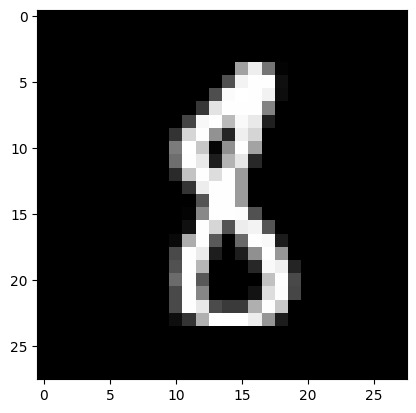

In [97]:

test_predictions(30, w1, b1, w2, b2)
